
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fff   ; text-align: center; border-radius: 5px 5px; padding: 5px">  Overview </h2> 

### Data Description:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

### Context

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

### Attribute Information:
    
* **Cement** : measured in kg in a m3 mixture
* **Blast** : measured in kg in a m3 mixture
* **Fly ash** : measured in kg in a m3 mixture
* **Water** : measured in kg in a m3 mixture
* **Superplasticizer** : measured in kg in a m3 mixture
* **Coarse Aggregate** : measured in kg in a m3 mixture
* **Fine Aggregate** : measured in kg in a m3 mixture
* **Age** : day (1~365)
* **Concrete compressive strength** measured in MPa

### Objective

**Modeling of strength of high performance concrete using Machine Learning.**

<a id = '2.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fff   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Import the necessary libraries </h2> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import itertools



# used to supress display of warnings
import warnings
warnings.filterwarnings("ignore")

# ols library
import statsmodels.api as sm
import statsmodels.formula.api as smf

import missingno as mno
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

# import zscore for scaling the data
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# pre-processing methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import TransformedTargetRegressor

# the regression models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn import metrics

from sklearn.pipeline import Pipeline

# feature-selection methods
from sklearn.feature_selection import SelectFromModel


<a id = '3.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fff   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Data Collection </h2> 

In [2]:
# Reading Concrete data
concrete_df = pd.read_csv("Concrete_Data.xls.csv")
concrete_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# Changing the names of the column headers
columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
        'Water  (component 4)(kg in a m^3 mixture)':'water',
        'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplastic',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarseagg',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
        'Age (day)':'age',
        'Concrete compressive strength(MPa, megapascals) ':'strength'}
concrete_df.rename(columns=columns,inplace=True)

<p style = "font-size:20px; color: #007580 "><strong> Shape of the data </strong></p> 

In [4]:
# Get the shape of Concrete data
concrete_df.shape

(1030, 9)

In [5]:
print("Number of rows = {0} and Number of Columns = {1} in Data frame".format(concrete_df.shape[0],concrete_df.shape[1]))

Number of rows = 1030 and Number of Columns = 9 in Data frame


<p style = "font-size:20px; color: #007580 "><strong> Data type of each attribute </strong></p> 

In [6]:
# Check datatypes
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
# Check Data frame info
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
# Column names of Data frame
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

<a id = '4.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fff   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Data Cleaning </h2> 


<p style = "font-size:20px; color: #007580 "><strong> Check Duplicates </strong></p> 

In [9]:
# Check duplicates in a data frame
concrete_df.duplicated().sum()

25

In [10]:
# View the duplicate records
duplicates = concrete_df.duplicated()

concrete_df[duplicates]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29



<p style = "font-size:20px; color: #007580 "><strong> Drop Duplicates </strong></p> 

In [11]:
# Delete duplicate rows
concrete_df.drop_duplicates(inplace=True)

In [12]:
# Get the shape of Concrete data
concrete_df.shape

(1005, 9)


<p style = "font-size:20px; color: #007580 "><strong> Check Outliers </strong></p> 

<AxesSubplot:>

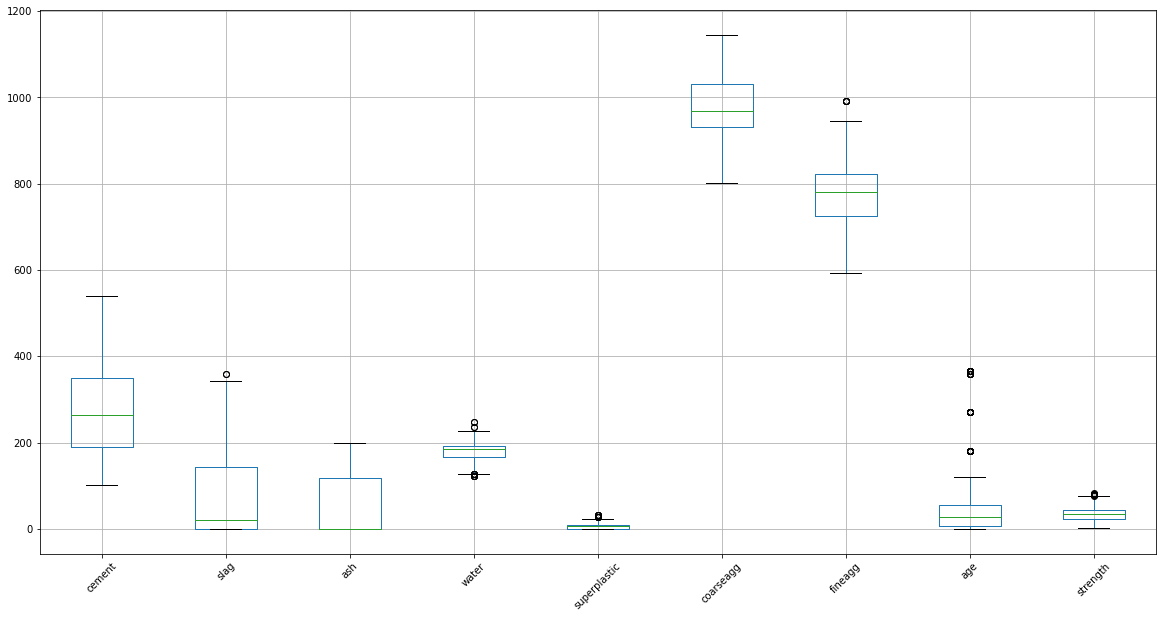

In [13]:
# Create a boxplot for all the continuous features
concrete_df.boxplot(column = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'], rot=45, figsize = (20,10))

* **Looking at the plot above; Slag, Water, Superplastic, Fineagg, Age and Strength columns have outliers and we need to treat those outliers.**


<p style = "font-size:20px; color: #007580 "><strong> Working with Outliers: Correcting, Removing </strong></p> 

In [14]:
concrete_df_outliers = pd.DataFrame(concrete_df.loc[:,])

# Calculate IQR
Q1 = concrete_df_outliers.quantile(0.25)
Q3 = concrete_df_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

cement          158.30
slag            142.50
ash             118.30
water            26.30
superplastic     10.00
coarseagg        99.00
fineagg          97.90
age              49.00
strength         21.35
dtype: float64


**Note:** The **first array contains the list of row numbers** and **second array respective column numbers** in concrete_df_outliers data frame

In [15]:
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [16]:
for i, j in zip(np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[0], np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = whisker[j]
    
# Replace every outlier on the lower side by the lower whisker - for 'water' column
for i, j in zip(np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[0], np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = whisker[j]

In [17]:
# Remove outliers columns - 'water', 'superplastic', 'fineagg', 'age', 'water' and 'strength'
concrete_df.drop(columns = concrete_df.loc[:,], inplace = True)

In [18]:
# Add 'water', 'superplastic', 'fineagg', 'age', 'water' and 'strength' with no outliers from concrete_df_outliers to 
# concrete_df
concrete_df = pd.concat([concrete_df, concrete_df_outliers], axis = 1)


<p style = "font-size:20px; color: #007580 "><strong> Check Outliers after correction </strong></p> 

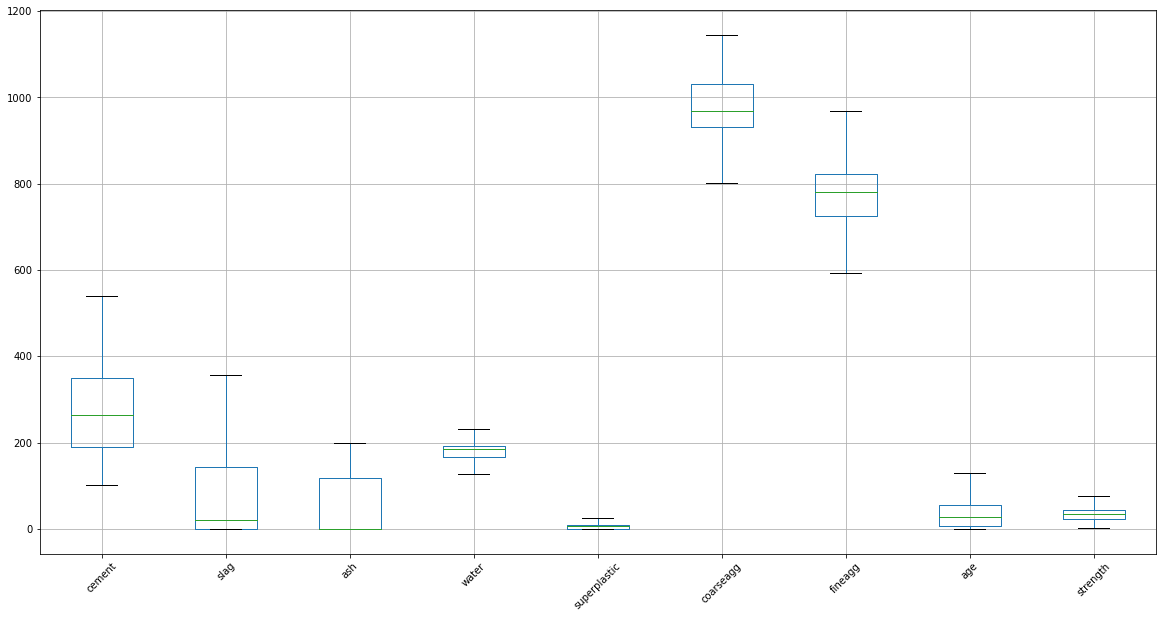

In [19]:
# Create a boxplot for all the continuous features
concrete_df.boxplot(column = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'], rot=45, figsize = (20,10));

* **Looking at the above plot, there are no more outliers in concrete data set**


<p style = "font-size:20px; color: #007580 "><strong> Check Missing Values </strong></p> 

In [20]:
# Check the presence of missing values
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<AxesSubplot:>

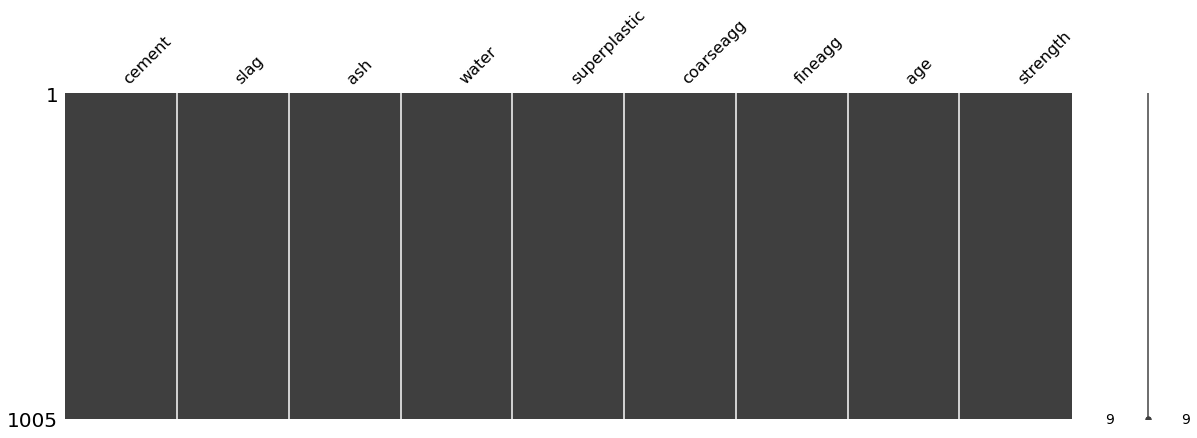

In [21]:
# Visualize missing values
mno.matrix(concrete_df, figsize = (20, 6))

In [22]:
# Summary statistics
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.000
slag,1005.0,72.037214,86.149994,0.00,0.00,20.0,142.50,356.250
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.100
water,1005.0,182.066816,21.158645,127.15,166.60,185.7,192.90,232.350
superplastic,1005.0,5.981493,5.724463,0.00,0.00,6.1,10.00,25.000
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.000
fineagg,1005.0,772.571095,80.035934,594.00,724.30,780.0,822.20,969.050
age,1005.0,38.076119,35.862549,1.00,7.00,28.0,56.00,129.500
strength,1005.0,35.226318,16.220253,2.33,23.52,33.8,44.87,76.895


<a id = '5.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fff   ; text-align: center; border-radius: 5px 5px; padding: 5px"> EDA (Data Analysis and Preparation) </h2> 


<p style = "font-size:20px; color: #007580 "><strong>  Variable Identification </strong></p> 

* **Target variable:** 'Strength'
* **Predictors (Input varibles):** 'Cement', 'Slag', 'Ash', 'Water', 'Superplastic', 'Coarseagg', 'Fineagg', 'Age'


<p style = "font-size:20px; color: #007580 "><strong> Univariate Analysis </strong></p> 

#### Numerical columns - 'Cement', 'Slag', 'Ash', 'Water', 'Superplastic', 'Coarseagg', 'Fineagg', 'Age' and 'Strength'

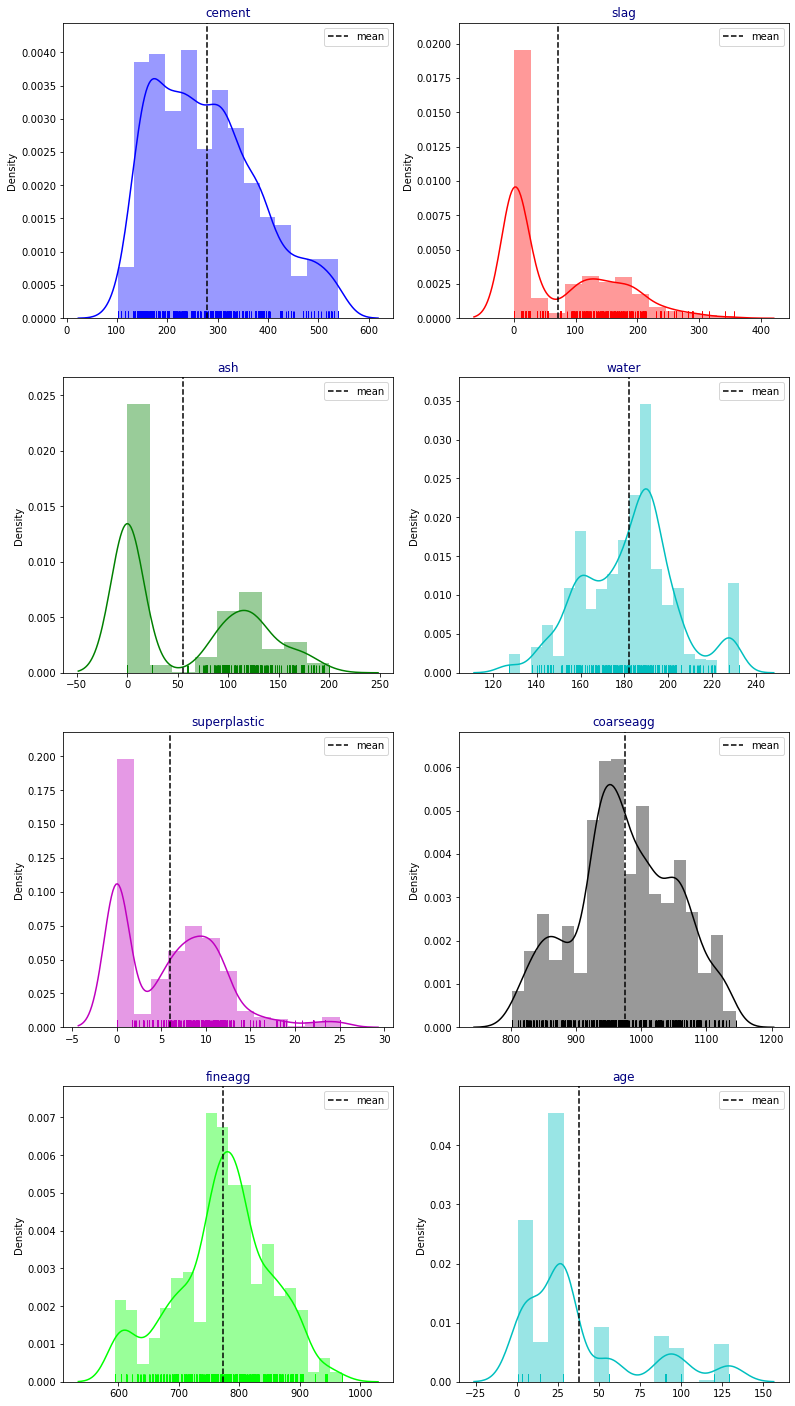

In [23]:
import itertools 
cols = [i for i in concrete_df.columns if i not in 'strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(concrete_df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(concrete_df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

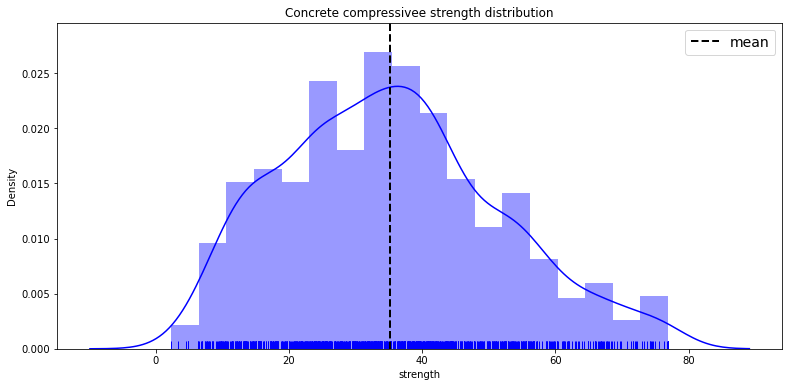

In [24]:
plt.figure(figsize=(13,6))
sns.distplot(concrete_df["strength"],color="b",rug=True)
plt.axvline(concrete_df["strength"].mean(), linestyle="dashed",color="k", label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Concrete compressivee strength distribution")
plt.show()

* **Strength column seems to be uniformly distributed**


<p style = "font-size:20px; color: #007580 "><strong> Multivariate Analysis </strong></p> 

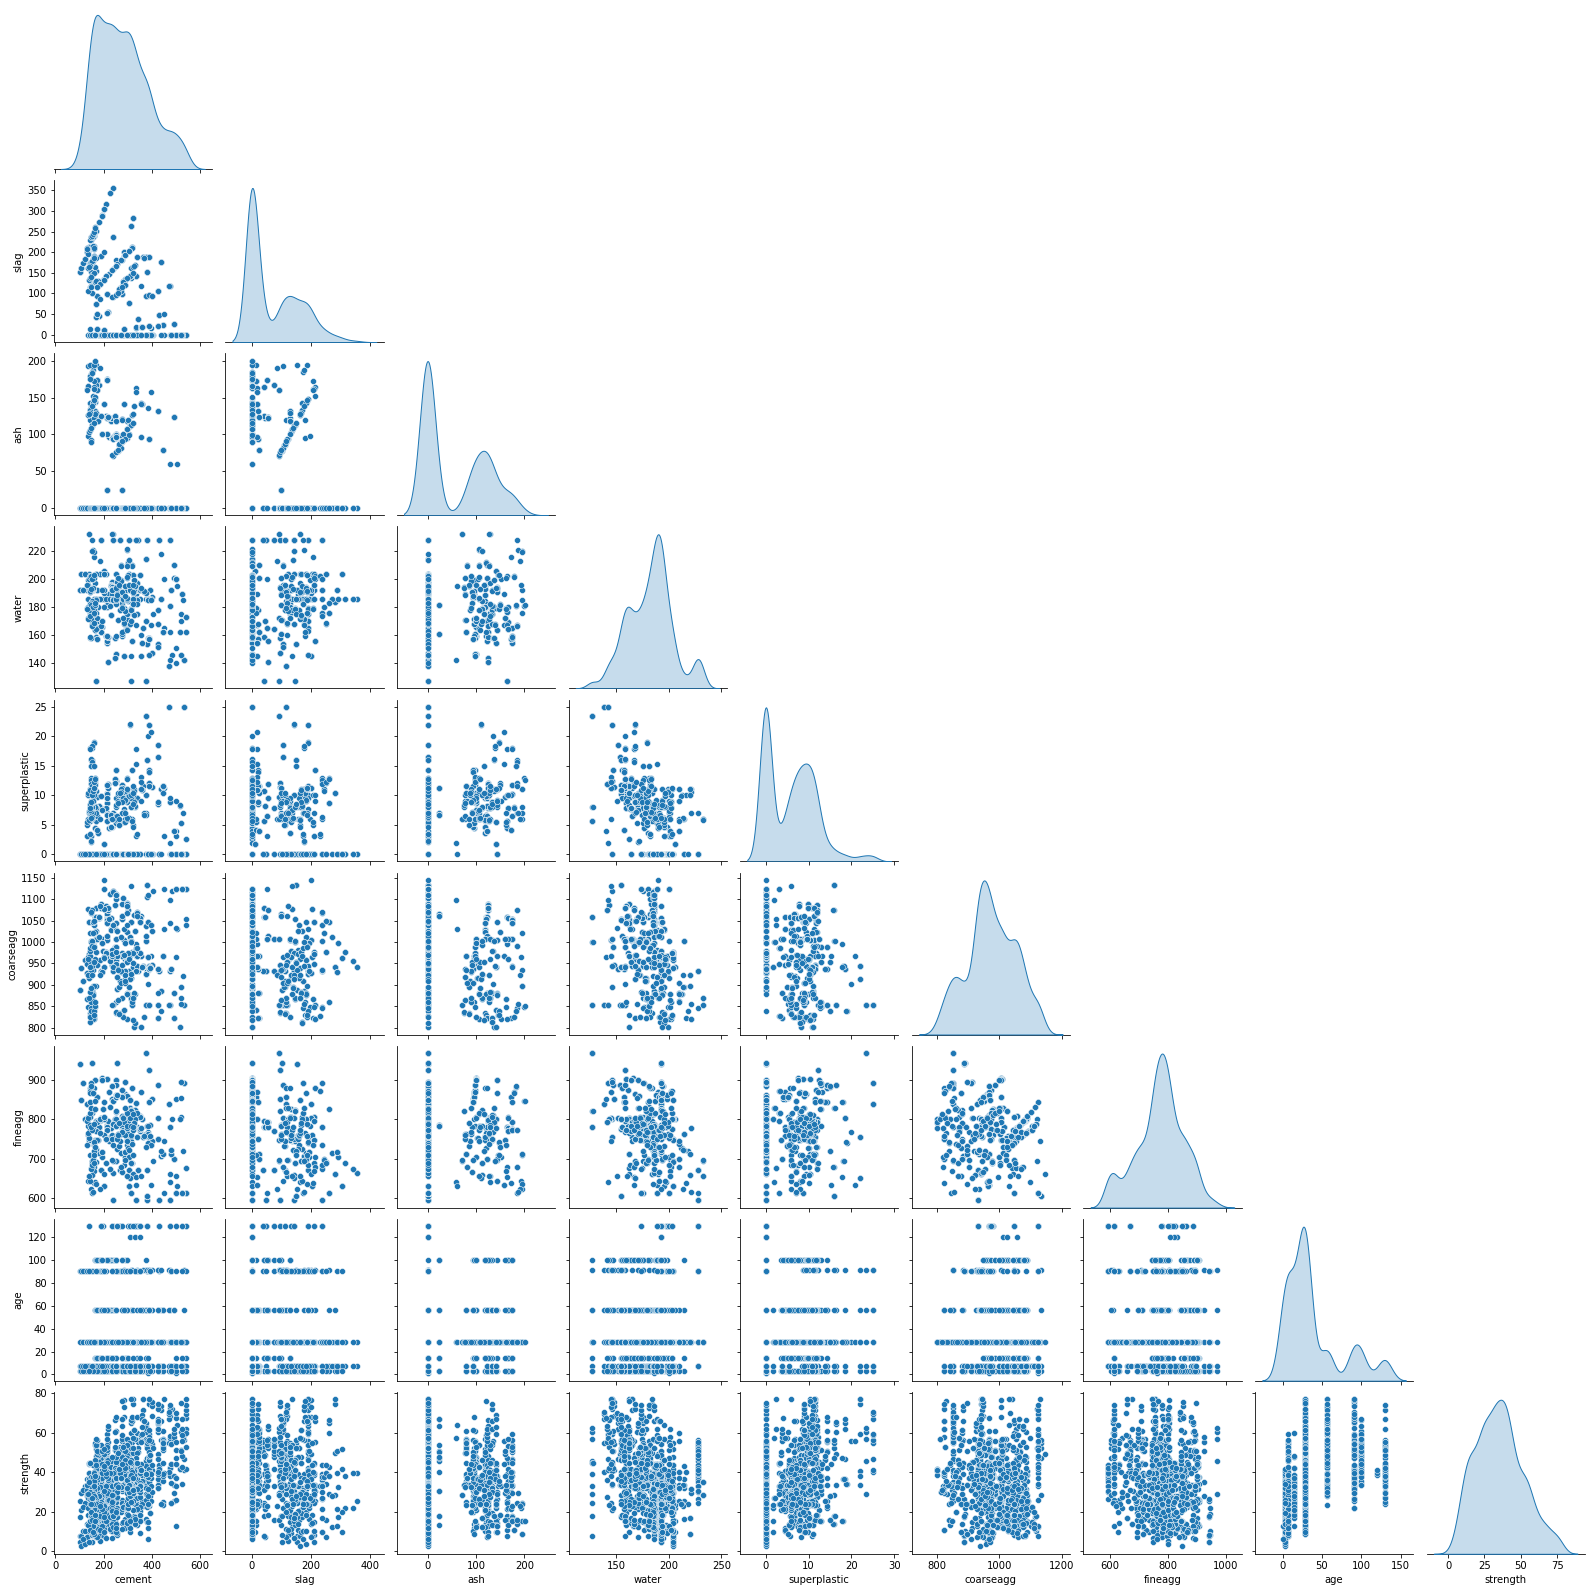

In [25]:
sns.pairplot(concrete_df, diag_kind = 'kde', corner = True)
plt.show()

#### Diagonals Analysis

* If we look at KDE diagonal plots, there are at least 2 Gaussians (2 peaks) in Slag, Ash, Superplastic and Age, even though it's not unsupervised learning but in this dataset there are at least 2 clusters and there may be more.

* Range of clusters in this dataset is 2 to 6.

* The diagonal analysis give same insights as we got from univariate analysis.

#### Off Diagonal Analysis: Relationship between indpendent attributes
##### Scatter plots

* Cement vs other independent attributes: This attribute does not have any significant relation with other independent features. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

* Slag vs other independent attributes: This attribute does not have any significant relation with other independent features. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

* Ash vs other independent attributes: This attribute does not have any significant relation with other independent features. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

* Water vs other independent attributes: This attribute have negative curvy-linear relationship with Fineagg, Coarseagg and Superplastic, as Water content increases means Fineagg, Coarseagg and Superplastic are reducing. It does not have any significant relationship with other independent atributes.

* Superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.

* Coarseagg vs other independent attributes: This attribute does not have any significant relation with other independent features. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

* Fineagg vs other independent attributes: It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.


#### Strength attribute : Relationship between dependent and independent attributes

* Strength vs Cement: It is having curvy-linear relationship with concrete cement and it is good predictor of concrete strength.
* Strength vs Slag: It is having very weak relationship with concrete slag because there are cloud of points(rectangular shape).
* Strength vs Ash: It is having weak relationship with concrete ash because there are cloud of points(rectangular shape).
* Strength vs Water: It is having curvy-linear relationship with water and it is good predictor of concrete strength.
* Strength vs Superplastic: It is having weak relationship with superplastic because there are cloud of points(ballon shape) and it might be a good predictor of concrete strength..
* Strength vs Coarseagg: It is having very weak relationship with concrete coarseagg because there are cloud of points(rectangular shape).
* Strength vs Fineagg: It is having very weak relationship with concrete fineagg because there are cloud of points(rectangular shape).
* Strength vs Age: It is having curvy-linear relationship with concrete age and it might be a good predictor of concrete strength.


* **Finally Cement, Water, Superplastic and Age can be good predictors of concrete strength.**

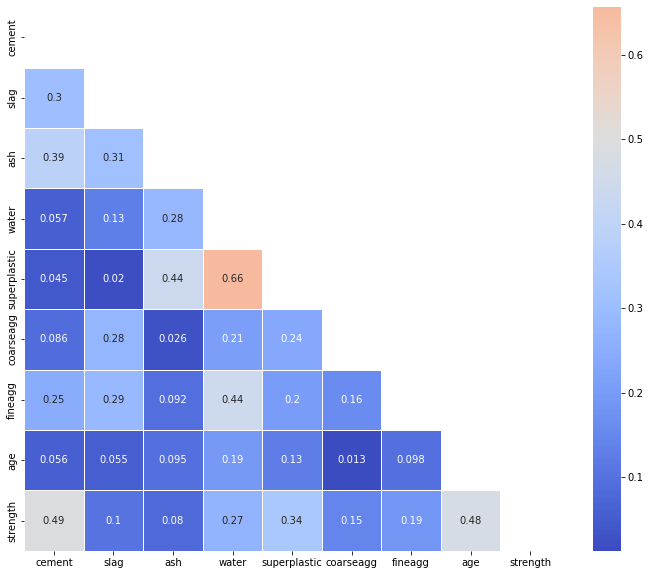

In [26]:
corr = abs(concrete_df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.show()

#### Observations:

* Looking at the Correlation table; 'Cement', 'Water', 'Superplastic' and 'Age' features are influencing the concrete strength.

* Concrete strength feature is having Moderate Positive Correlation with Cement feature.
* Concrete strength feature is having Low Positive Correlation with Superplastic and Age features
* Concrete strength feature is having Low Positive Correlation with Water features
* Concrete strength feature is having negligible Correlation with Slag, Ash, Coarseagg and Fineagg features
* Water feature is having Moderate Positive Correlation with Superplastic feature
* Concrete cement feature is having Low Positive Correlation with Slag and Ash features
* Concrete fineagg feature is having Low Positive Correlation with Water feature
* Concrete ash feature is having Low Positive Correlation with Superplastic feature


<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fff   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Model Building and Validation </h2> 


<p style = "font-size:20px; color: #007580 "><strong> Sampling Techniques - Create Training and Test Set </strong></p> 

In [27]:
X = concrete_df.drop(['strength'], axis = 1) 
y = concrete_df['strength']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [29]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (703,8)
y_train shape : (703,)
X_test shape : (302,8)
y_test shape : (302,)


In [30]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale):
    
    print (model)
    print ("***************************************************************************")
    
    if scale == 'yes':
        # prepare the model with input scaling
        pipeline = Pipeline([('scaler', PowerTransformer()), ('model', model)])
    elif scale == 'no':
        # prepare the model with input scaling
        pipeline = Pipeline([('model', model)])

    pipeline.fit(X_train, y_train) # Fit the model on Training set
    prediction = pipeline.predict(X_test) # Predict on Test set

    r2 = metrics.r2_score(y_test, prediction) # Calculate the r squared value on the Test set
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction)) # Root mean squared error
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))
    
    # Accuracy of Training data set
    train_accuracy_score = pipeline.score(X_train, y_train)
    
    # Accuracy of Test data set
    test_accuracy_score = pipeline.score(X_test, y_test)
    
    print ("***************************************************************************")
    
    if of_type == "coef":
        
        # FEATURE IMPORTANCES plot
        plt.figure(figsize=(13,12))
        plt.subplot(211)
        print(model.coef_)
        coef = pd.DataFrame(np.sort(model.coef_)[::-1].ravel())
        coef["feat"] = X_train.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r", linewidth=2)
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title(method + ' ' + 'FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        
        # FEATURE IMPORTANCES plot
        plt.figure(figsize=(13,12))
        plt.subplot(211)
        coef = pd.DataFrame(np.sort(model.feature_importances_)[::-1])
        coef["feat"] = X_train.columns
        ax2 = sns.barplot(coef["feat"], coef[0],palette="jet_r", linewidth=2)
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title(method + ' ' + 'FEATURE IMPORTANCES')
    
    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'R Squared': r2, 'RMSE': rmse, 'Train Accuracy': train_accuracy_score, 
                              'Test Accuracy': test_accuracy_score}, index=[index])
    
    return resultsDf  # return all the metrics along with predictions

<p style = "font-size:20px; color: #007580 "><strong> Linear Regression </strong></p> 

In [31]:
# Building a Linear Regression model
lr = LinearRegression()
                                                     
# Train and Test the model
resultsDf = train_test_model(lr, 'LinearRegression', X_train, X_test, y_train, y_test, 'none', 1, 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf

LinearRegression()
***************************************************************************
***************************************************************************


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.712266,8.790234,0.723934,0.712266


**Insite: This model performs better on training set and poorly on test set which shows that it's an overfitting and very complex model.**



<p style = "font-size:20px; color: #007580 "><strong> Ridge Regression </strong></p> 

Ridge(random_state=1)
***************************************************************************
The intercept for our model is 35.213036984352776 

The coefficient for cement is 8.79194875822046
The coefficient for slag is 4.942783268859851
The coefficient for ash is 0.9935897472624142
The coefficient for water is -4.8831362644095035
The coefficient for superplastic is 1.617353072627993
The coefficient for coarseagg is -0.6225085818652392
The coefficient for fineagg is -2.0530092281516303
The coefficient for age is 9.598599922195076
***************************************************************************
[ 8.79194876  4.94278327  0.99358975 -4.88313626  1.61735307 -0.62250858
 -2.05300923  9.59859992]


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.712266,8.790234,0.723934,0.712266
2,Ridge,0.800201,7.324907,0.814286,0.800201


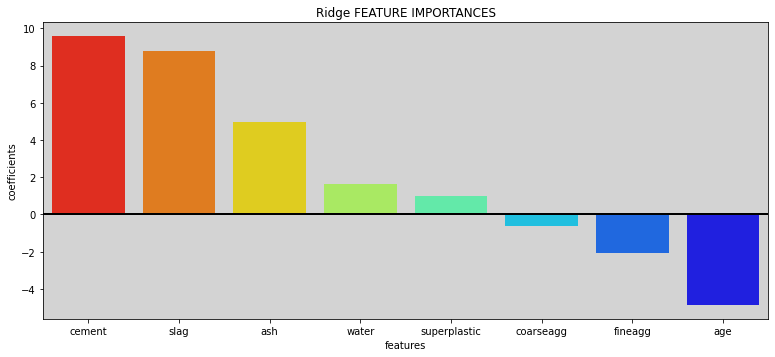

In [32]:
# Building a Ridge Regression model
rr = Ridge(random_state = 1)

# Train and Test the model
rr_resultsDf = train_test_model(rr, 'Ridge', X_train, X_test, y_train, y_test, 'coef', 2, 'yes')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,rr_resultsDf])
resultsDf

<p style = "font-size:20px; color: #007580 "><strong> Lasso Regression </strong></p>

Lasso(random_state=1)
***************************************************************************
The intercept for our model is 35.213036984352776 

The coefficient for cement is 7.589092841901852
The coefficient for slag is 3.731634871882419
The coefficient for ash is 0.0
The coefficient for water is -2.9416038702012184
The coefficient for superplastic is 2.5162395277673433
The coefficient for coarseagg is -0.0
The coefficient for fineagg is -0.8084731949481245
The coefficient for age is 8.532184995437005
***************************************************************************
[ 7.58909284  3.73163487  0.         -2.94160387  2.51623953 -0.
 -0.80847319  8.532185  ]


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.712266,8.790234,0.723934,0.712266
2,Ridge,0.800201,7.324907,0.814286,0.800201
3,Lasso,0.778816,7.706935,0.789811,0.778816


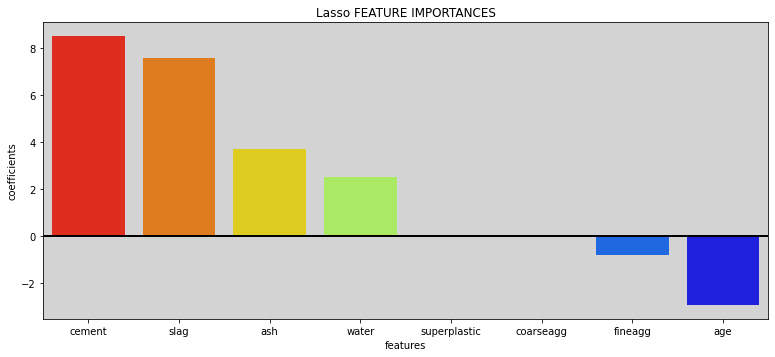

In [33]:
# Building a Lasso Regression model
lasso = Lasso(random_state = 1)

# Train and Test the model
lasso_resultsDf = train_test_model(lasso, 'Lasso', X_train, X_test, y_train, y_test, 'coef', 3, 'yes')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf, lasso_resultsDf])
resultsDf

<p style = "font-size:20px; color: #007580 "><strong> Polynomial Linear Regression </strong></p>

**Let's try polynomial model on the same data from 1 to 5 degree polynomial features**

In [34]:
for i in range(1,6):
    pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = i)), 
                 ('model', LinearRegression())])
    pipe.fit(X_train, y_train) # Fit the model on Training set
    prediction = pipe.predict(X_test) # Predict on Test set

    r2 = metrics.r2_score(y_test, prediction) # Calculate the r squared value on the Test set
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction)) # Root mean squared error
    
    print ("R-Squared for {0} degree polynomial is {1}".format(i, r2))
    print ("ROOT MEAN SQUARED ERROR for {0} degree polynomial features is {1}".format(i, rmse),"\n")

R-Squared for 1 degree polynomial is 0.8002192566552297
ROOT MEAN SQUARED ERROR for 1 degree polynomial features is 7.324564631954919 

R-Squared for 2 degree polynomial is 0.8686831774000725
ROOT MEAN SQUARED ERROR for 2 degree polynomial features is 5.938341730860457 

R-Squared for 3 degree polynomial is 0.6309552388021218
ROOT MEAN SQUARED ERROR for 3 degree polynomial features is 9.955074753616241 

R-Squared for 4 degree polynomial is -858.0304319878653
ROOT MEAN SQUARED ERROR for 4 degree polynomial features is 480.2963407913865 

R-Squared for 5 degree polynomial is -5.625879845068772e+18
ROOT MEAN SQUARED ERROR for 5 degree polynomial features is 38868719148.724045 



**By looking at the above results, RMSE is start increasing from 1 degree polynomial which has 6.77 RMSE and RMSE came down to 5.50 for 2 degree polynomial features. Again from 3 degree polynomial RMSE is starts increasing hence optimal degree of polynomial is 2 degree polynomial.**

**Let's try 2-degree polynomial model on the same data**

In [35]:
pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = 2)), 
                 ('model', LinearRegression())])
    
pipe.fit(X_train, y_train) # Fit the model on Training set
prediction = pipe.predict(X_test) # Predict on Test set
        
r2 = metrics.r2_score(y_test, prediction) # Calculate the r squared value on the Test set
rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction)) # Root mean squared error
accuracy_score = pipe.score(X_test, y_test)
# Store the accuracy results for each model in a dataframe for final comparison
poly_resultsDf = pd.DataFrame({'Method': 'Linear Regression with Polynomial features', 'R Squared': r2, 'RMSE': rmse, 'Train Accuracy': pipe.score(X_train, y_train), 
                          'Test Accuracy': accuracy_score}, index=[4])
resultsDf = pd.concat([resultsDf, poly_resultsDf])
resultsDf

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.712266,8.790234,0.723934,0.712266
2,Ridge,0.800201,7.324907,0.814286,0.800201
3,Lasso,0.778816,7.706935,0.789811,0.778816
4,Linear Regression with Polynomial features,0.868683,5.938342,0.880724,0.868683


**By looking at above results, 2-degree polynomial model is performs better on training set and even on test set with 1% difference which shows that it's like to be sweet spot. Henc let's try with non-regularized models.**

<p style = "font-size:20px; color: #007580 "><strong> KNN Regressor </strong></p>

#### Transform original data

In [36]:
def train_test_transform(X_train, X_test):
    scale = PowerTransformer()
    
    X_train_scaled = pd.DataFrame(scale.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scale.fit_transform(X_test))
    
    return X_train_scaled, X_test_scaled

Text(0, 0.5, 'Mean error')

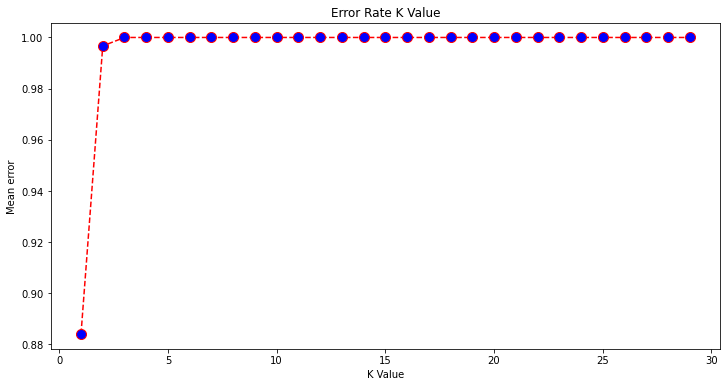

In [37]:
# empty list that will hold error
error = []

X_train_scaled, X_test_scaled = train_test_transform(X_train, X_test)

# perform error metrics for values from 1,2,3....29
for k in range(1,30):
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    error.append(np.mean(y_pred != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

#### Optimal value of K is 2

In [38]:
# Building a KNN Regression model
knn = KNeighborsRegressor(n_neighbors = 2)

# Train and Test the model
knn_resultsDf = train_test_model(knn, 'KNeighborsRegressor', X_train, X_test, y_train, y_test, 'none', 5, 'yes')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf, knn_resultsDf])
resultsDf

KNeighborsRegressor(n_neighbors=2)
***************************************************************************
***************************************************************************


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.712266,8.790234,0.723934,0.712266
2,Ridge,0.800201,7.324907,0.814286,0.800201
3,Lasso,0.778816,7.706935,0.789811,0.778816
4,Linear Regression with Polynomial features,0.868683,5.938342,0.880724,0.868683
5,KNeighborsRegressor,0.835358,6.649283,0.953485,0.835358


**Observation: This model performs better on training set and poorly on test set which shows that it's an overfitting and very complex model.**

SVR(kernel='linear')
***************************************************************************
The intercept for our model is [34.92711166] 

The coefficient for cement is 8.212540546546565
The coefficient for slag is 4.4252549749417875
The coefficient for ash is 0.9402786144435469
The coefficient for water is -4.6442293929030685
The coefficient for superplastic is 1.720964657734186
The coefficient for coarseagg is -0.6050364142464848
The coefficient for fineagg is -1.9697485710656166
The coefficient for age is 9.704869489586509
***************************************************************************
[[ 8.21254055  4.42525497  0.94027861 -4.64422939  1.72096466 -0.60503641
  -1.96974857  9.70486949]]
DecisionTreeRegressor(random_state=1)
***************************************************************************
***************************************************************************
RandomForestRegressor(random_state=1)
*********************************************************

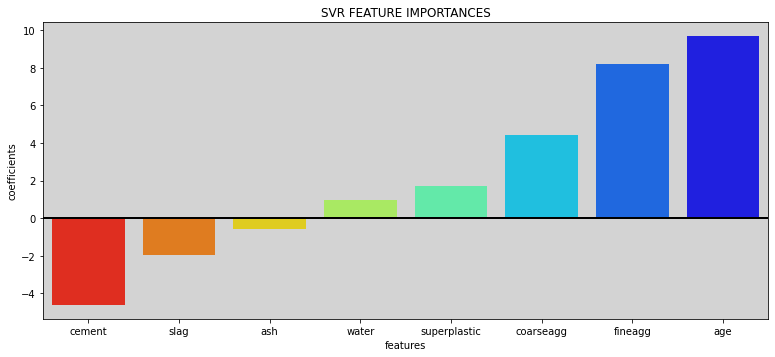

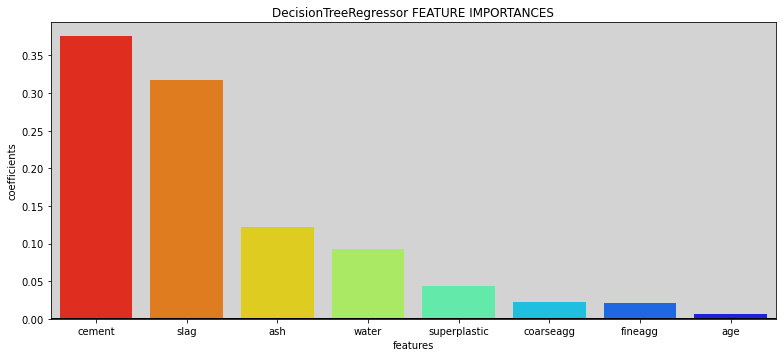

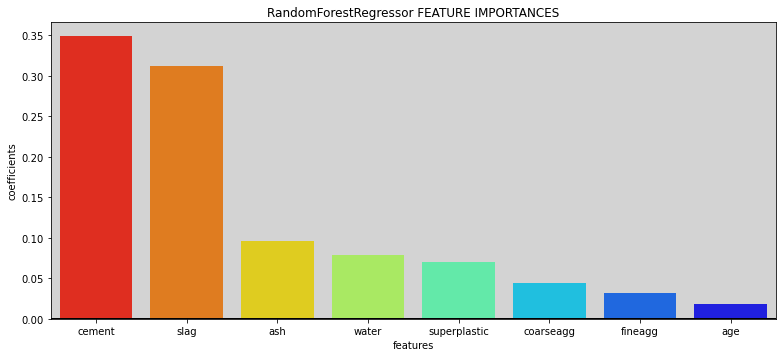

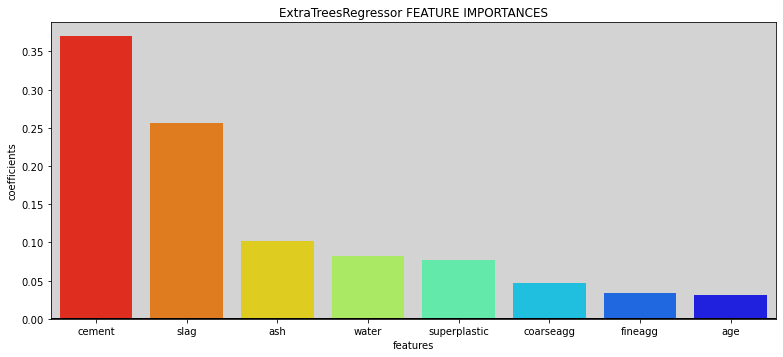

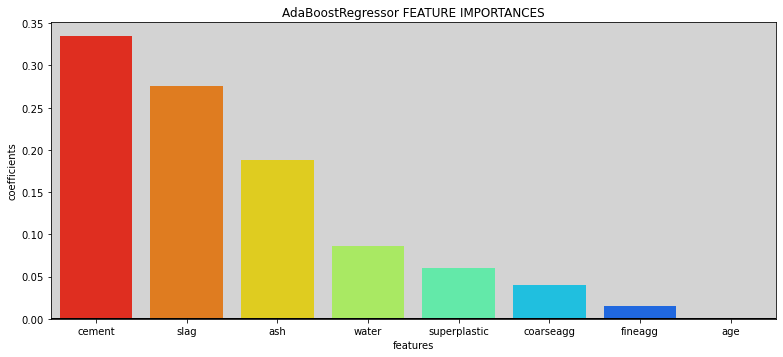

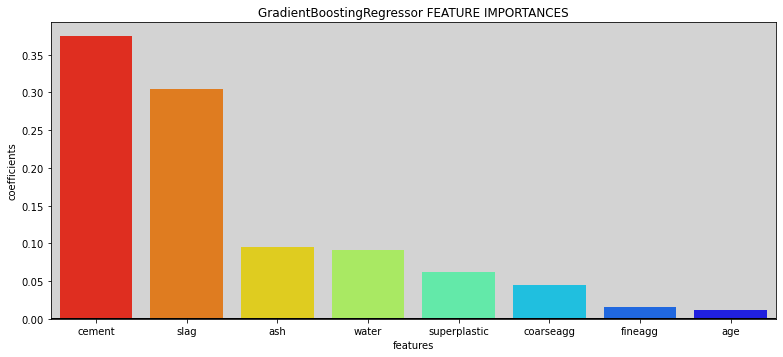

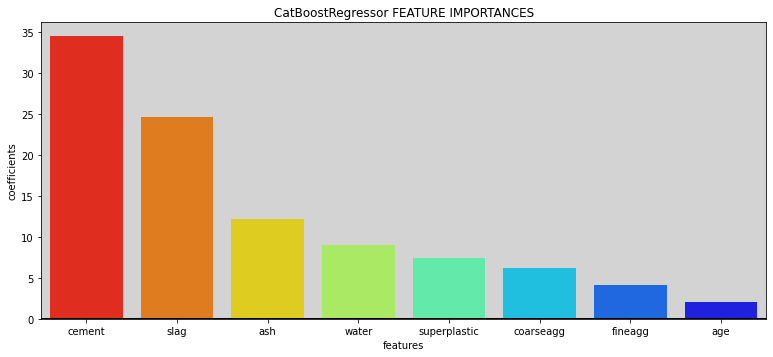

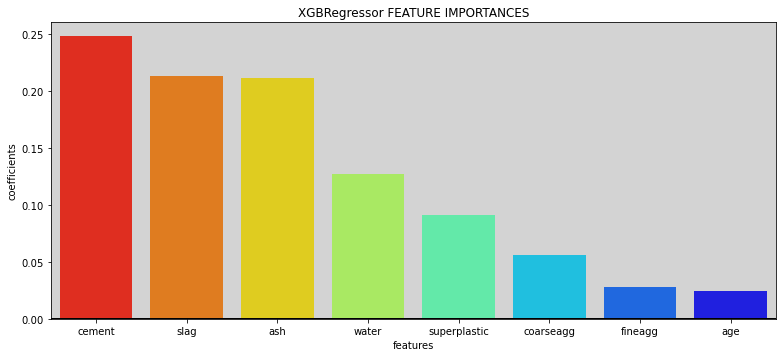

In [39]:
# define regressor models
models=[
    ['SVR',SVR(kernel='linear')],
    ['DecisionTreeRegressor', DecisionTreeRegressor(random_state = 1)],
    ['RandomForestRegressor',RandomForestRegressor(random_state = 1)],
    ['BaggingRegressor',BaggingRegressor(random_state = 1)],
    ['ExtraTreesRegressor',ExtraTreesRegressor(random_state = 1)],
    ['AdaBoostRegressor',AdaBoostRegressor(random_state = 1)],
    ['GradientBoostingRegressor',GradientBoostingRegressor(random_state = 1)],
    ['CatBoostRegressor',CatBoostRegressor(random_state = 1, verbose=False)],
    ['XGBRegressor',XGBRegressor()]
]


i = 6
for name, regressor in models:
    if name == 'SVR':
        # Train and Test the model
        svr_resultsDf = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'coef', i, 'yes')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf = pd.concat([resultsDf, svr_resultsDf])
    elif name == 'BaggingRegressor':
        # Train and Test the model
        bag_resultsDf = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'none', i, 'yes')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf = pd.concat([resultsDf, bag_resultsDf])
    else:
        # Train and Test the model
        ensemble_resultsDf = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'feat', i, 'yes')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf = pd.concat([resultsDf, ensemble_resultsDf])
    i = i+1

In [40]:
# Show results dataframe
resultsDf

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.712266,8.790234,0.723934,0.712266
2,Ridge,0.800201,7.324907,0.814286,0.800201
3,Lasso,0.778816,7.706935,0.789811,0.778816
4,Linear Regression with Polynomial features,0.868683,5.938342,0.880724,0.868683
5,KNeighborsRegressor,0.835358,6.649283,0.953485,0.835358
6,SVR,0.798268,7.360239,0.811988,0.798268
7,DecisionTreeRegressor,0.818129,6.988552,0.998336,0.818129
8,RandomForestRegressor,0.899028,5.207203,0.984764,0.899028
9,BaggingRegressor,0.891627,5.394675,0.979782,0.891627
10,ExtraTreesRegressor,0.887108,5.506009,0.998336,0.887108


<a id = '10.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fff; text-align: center; border-radius: 5px 5px; padding: 5px">  Inference </h2> 

- Here, We use 14 types of algorithm for prediction, but  not get satisfactory accuracy for models.
- We can say that,Standardization of data using PowerTransformer improves accuracy slightly.
- Most of the algorithms get overfitted
- But still from that all results we found, linear regression with polynomial feature perform better.
- boosting algorithm also perform good bt it get overfitted, but if we choose from that cat boost algorithm perform well from all of these